In [1]:
#from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
from astropy.table import Table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-04-14 20:58:19.094543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.config.list_physical_devices('GPU')

[]

# Read Data

In [2]:
ls /blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2

adaptive_param_plot.py  __init__.py     README~   sp--s-i/  spu-smi/  s-u-smi/
allgeos_props.fits      JWST.ipynb      s-pbhmi/  s-p-smi/  s---s-i/
ccds.ipynb              MIRI_ccd.pdf    s-pbsmi/  sp--smi/  s---smi/
ccds.py                 NIRCam_ccd.pdf  sp--h-i/  spubhmi/  s-ubhmi/
ccds.py~                __pycache__/    s-p-hmi/  spubsmi/  s-ubsmi/
dust_opacity.fits       README          sp--hmi/  spu-hmi/  s-u-hmi/


In [3]:
data_1mm_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')
data_1mm_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/convolved/user_filters/ALMA-IMF_1mm.fits')

In [4]:
# sp--s-i, s---s-i, sp--smi, s---smi, sp--h-i, sp-hmi
data_1mm = [
    #data_1mm_sp__s_i,
    data_1mm_spu_smi,
    data_1mm_s_u_smi,
    data_1mm_s_pbhmi,
    data_1mm_s_p_smi,
    #data_1mm_s___s_i,
    data_1mm_s_pbsmi,
    #data_1mm_sp__smi,
    #data_1mm_s___smi,
    #data_1mm_sp__h_i,
    data_1mm_spubhmi,
    data_1mm_s_ubhmi,
    data_1mm_s_p_hmi,
    data_1mm_spubsmi,
    data_1mm_s_ubsmi,
    #data_1mm_sp__hmi,
    data_1mm_spu_hmi,
    data_1mm_s_u_hmi
    ]

In [5]:
data_3mm_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')
data_3mm_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/convolved/user_filters/ALMA-IMF_3mm.fits')

In [6]:
# sp--s-i, s---s-i, sp--smi, s---smi, sp--h-i, sp-hmi
data_3mm = [
    #data_3mm_sp__s_i,
    data_3mm_spu_smi,
    data_3mm_s_u_smi,
    data_3mm_s_pbhmi,
    data_3mm_s_p_smi,
    #data_3mm_s___s_i,
    data_3mm_s_pbsmi,
    #data_3mm_sp__smi,
    #data_3mm_s___smi,
    #data_3mm_sp__h_i,
    data_3mm_spubhmi,
    data_3mm_s_ubhmi,
    data_3mm_s_p_hmi,
    data_3mm_spubsmi,
    data_3mm_s_ubsmi,
    #data_3mm_sp__hmi,
    data_3mm_spu_hmi,
    data_3mm_s_u_hmi
]

In [7]:
data_aug_sp__s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--s-i/augmented_parameters.fits')
data_aug_spu_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-smi/augmented_parameters.fits')
data_aug_s_u_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-smi/augmented_parameters.fits')
data_aug_s_pbhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbhmi/augmented_parameters.fits')
data_aug_s_p_smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-smi/augmented_parameters.fits')
data_aug_s___s_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---s-i/augmented_parameters.fits')
data_aug_s_pbsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-pbsmi/augmented_parameters.fits')
data_aug_sp__smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--smi/augmented_parameters.fits')
data_aug_s___smi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s---smi/augmented_parameters.fits')
data_aug_sp__h_i = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--h-i/augmented_parameters.fits')
data_aug_spubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubhmi/augmented_parameters.fits')
data_aug_s_ubhmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubhmi/augmented_parameters.fits')
data_aug_s_p_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-p-hmi/augmented_parameters.fits')
data_aug_spubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spubsmi/augmented_parameters.fits')
data_aug_s_ubsmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-ubsmi/augmented_parameters.fits')
data_aug_sp__hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/sp--hmi/augmented_parameters.fits')
data_aug_spu_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/spu-hmi/augmented_parameters.fits')
data_aug_s_u_hmi = Table.read('/blue/ast7939/savannahgramze/robitaille/robitaille_models-1.2/s-u-hmi/augmented_parameters.fits')

In [8]:
data_aug = [
    #data_aug_sp__s_i,
    data_aug_spu_smi,
    data_aug_s_u_smi,
    data_aug_s_pbhmi,
    data_aug_s_p_smi,
    #data_aug_s___s_i,
    data_aug_s_pbsmi,
    #data_aug_sp__smi,
    #data_aug_s___smi,
    #data_aug_sp__h_i,
    data_aug_spubhmi,
    data_aug_s_ubhmi,
    data_aug_s_p_hmi,
    data_aug_spubsmi,
    data_aug_s_ubsmi,
    #data_aug_sp__hmi,
    data_aug_spu_hmi,
    data_aug_s_u_hmi
]

In [9]:
# sp--s-i, s---s-i, sp--smi, s---smi, sp--h-i, sp--hmi
geos = [
    #'sp--s-i',
    'spu-smi',
    's-u-smi',
    's-pbhmi',
    's-p-smi',
    #'s---s-i',
    's-pbsmi',
    #'sp--smi',
    #'s---smi',
    #'sp--h-i',
    'spubhmi',
    's-ubhmi',
    's-p-hmi',
    'spubsmi',
    's-ubsmi',
    #'sp--hmi',
    'spu-hmi',
    's-u-hmi'
]

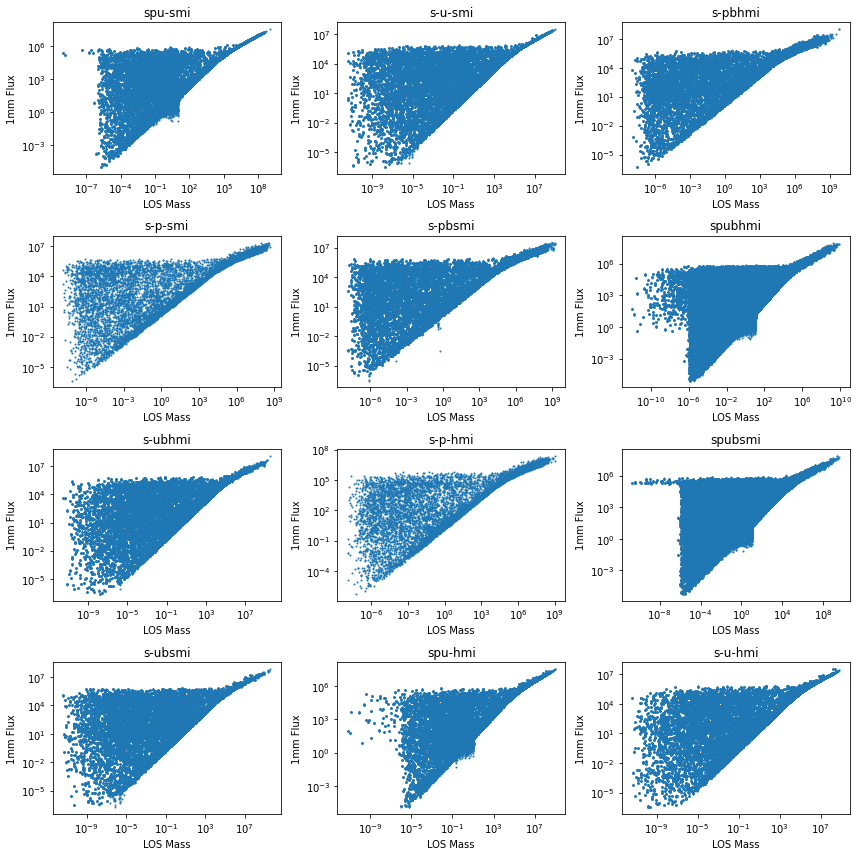

In [12]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('1mm Flux')
    try: 
        axs[ii].scatter(data_aug[ii]['Line-of-Sight Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()
plt.savefig('./plots/1mmlos.png')

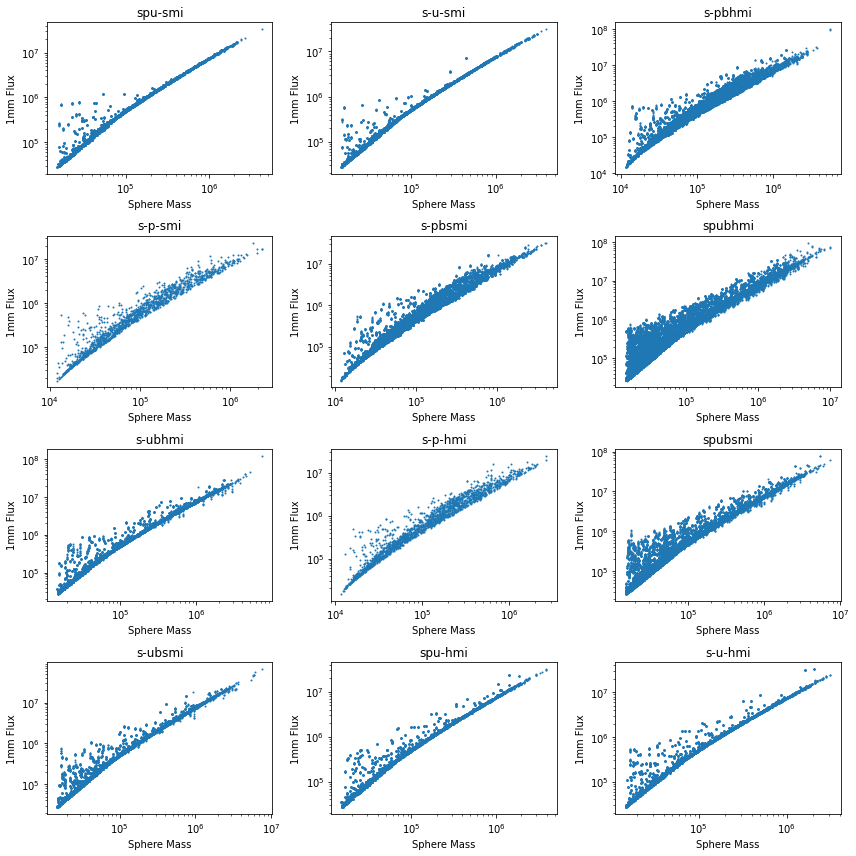

In [14]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('1mm Flux')
    try: 
        axs[ii].scatter(data_aug[ii]['Sphere Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()
plt.savefig('./plots/1mmsph.png')

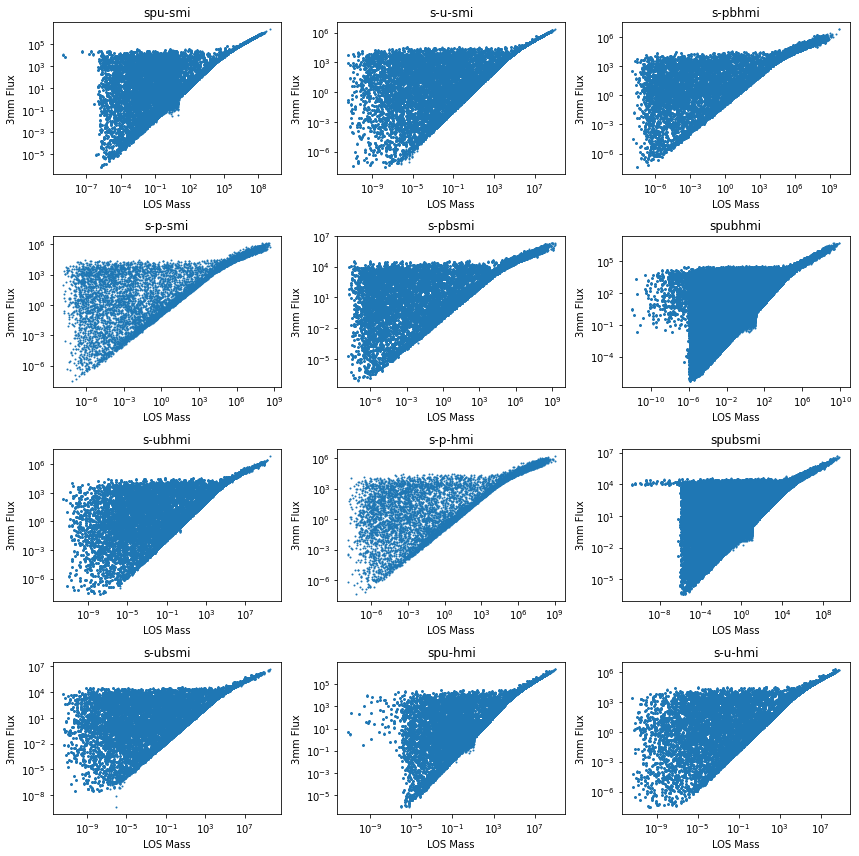

In [16]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    axs[ii].set_xlabel('LOS Mass')
    axs[ii].set_ylabel('3mm Flux')
    try: 
        axs[ii].scatter(data_aug[ii]['Line-of-Sight Masses'][:, -1], data_3mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()
plt.savefig('./plots/3mmlos.png')

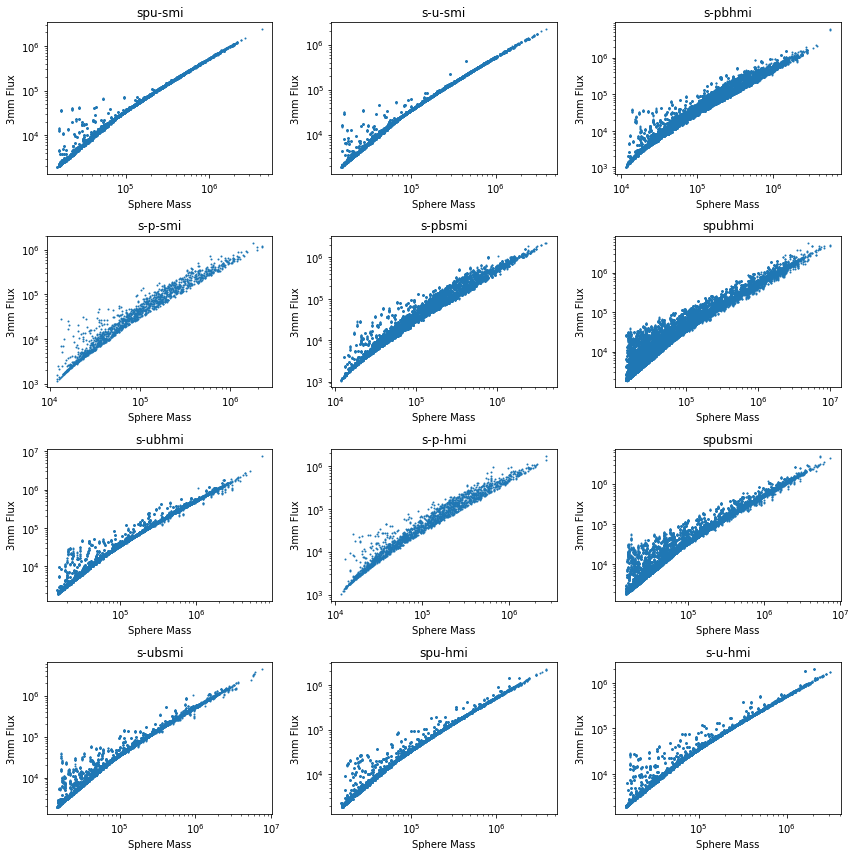

In [17]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    axs[ii].set_xlabel('Sphere Mass')
    axs[ii].set_ylabel('3mm Flux')
    try: 
        axs[ii].scatter(data_aug[ii]['Sphere Masses'][:, -1], data_3mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()
plt.savefig('./plots/3mmsph.png')

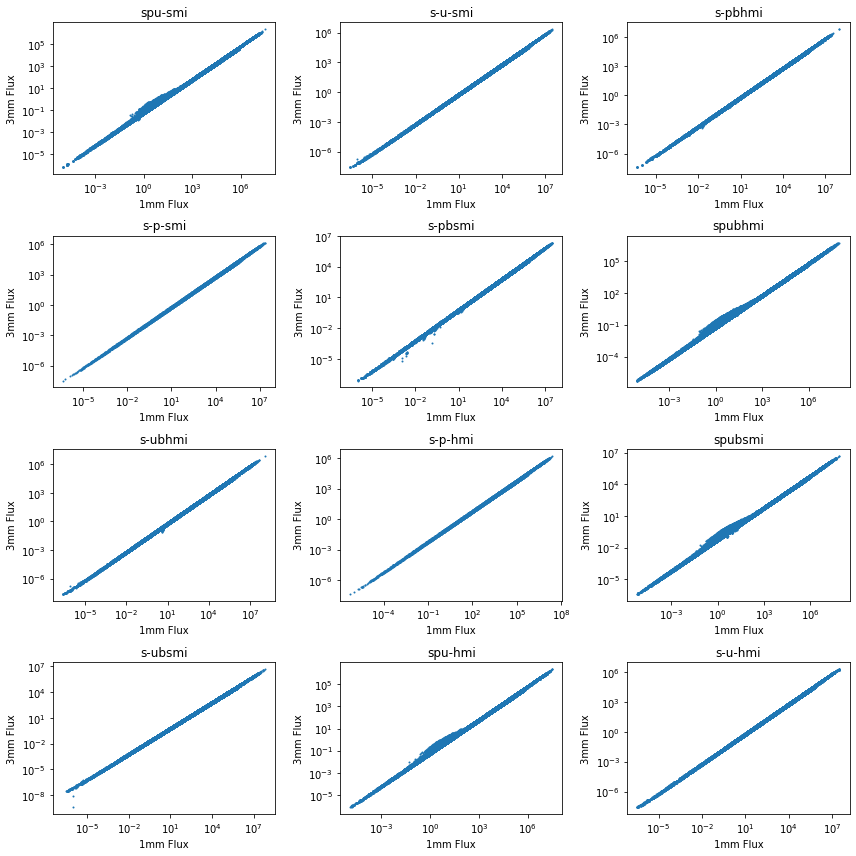

In [15]:
fig, axes = plt.subplots(4,3, figsize=(12,12))

axs = axes.flatten()

#axs[0].scatter(data_aug_spubhmi['Line-of-Sight Masses'][:, -1], data_1mm_spubhmi['TOTAL_FLUX'][:, -1], 1)

for ii in range(len(axs)):
    axs[ii].set_xscale('log')
    axs[ii].set_yscale('log')
    axs[ii].set_title(geos[ii])
    axs[ii].set_xlabel('1mm Flux')
    axs[ii].set_ylabel('3mm Flux')
    try: 
        axs[ii].scatter(data_1mm[ii]['TOTAL_FLUX'][:, -1], data_3mm[ii]['TOTAL_FLUX'][:, -1], 1)
    except:
        print('No Mass:', geos[ii])
fig.tight_layout()
plt.savefig('./plots/1mm3mm.png')

In [14]:
# sp--s-i, s---s-i, sp--smi, s---smi, sp--h-i, sp-hmi

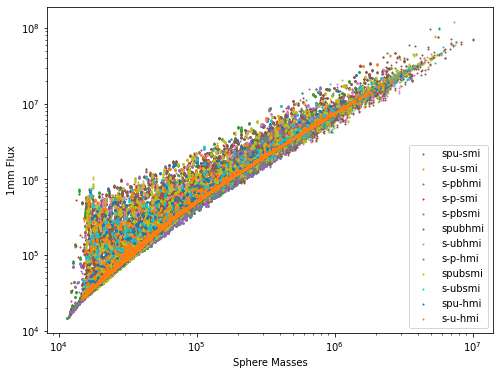

In [18]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    plt.scatter(data_aug[ii]['Sphere Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], 1, label=geos[ii])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('1mm Flux')
plt.savefig('./plots/1mmsph_1plot.png')

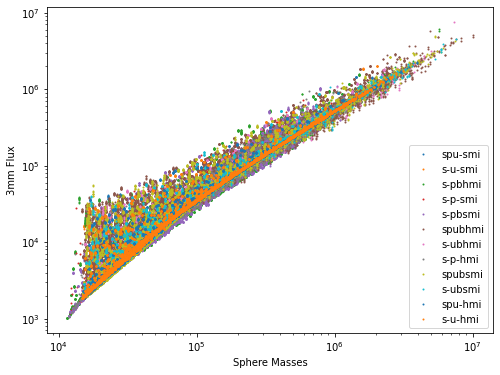

In [19]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    plt.scatter(data_aug[ii]['Sphere Masses'][:, -1], data_3mm[ii]['TOTAL_FLUX'][:, -1], 1, label=geos[ii])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Sphere Masses')
plt.ylabel('3mm Flux')
plt.savefig('./plots/3mmsph_1plot.png')

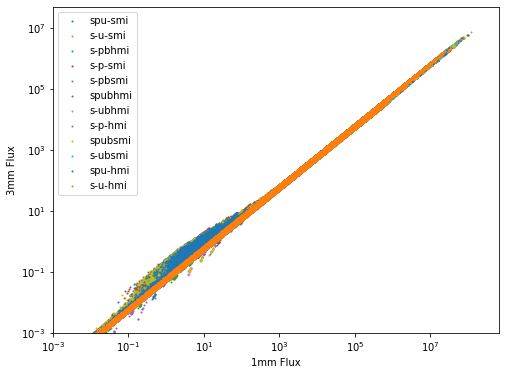

In [20]:
fig = plt.figure(figsize=(8,6))
for ii in range(12):
    plt.scatter(data_1mm[ii]['TOTAL_FLUX'][:, -1], data_3mm[ii]['TOTAL_FLUX'][:, -1], 1, label=geos[ii])
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('1mm Flux')
plt.ylabel('3mm Flux')
plt.xlim(left=10**-3)
plt.ylim(bottom=10**-3)
plt.savefig('./plots/1mm3mm_1plot.png')

In [18]:
# Inputs: 1mm and 3mm fluxes
#
# Outputs: Mass LOS, Mass Sphere

# Ready Data

In [37]:
arr = []

for ii in range(12):
    geometry = geos[ii]
    masses_sph = np.max(data_aug[ii]['Sphere Masses'], axis=1)
    masses_los = np.max(data_aug[ii]['Line-of-Sight Masses'], axis=1)
    fluxes_1mm = np.max(data_1mm[ii]['TOTAL_FLUX'], axis=1)
    fluxes_3mm = np.max(data_3mm[ii]['TOTAL_FLUX'], axis=1)
    
    d = {'Geometry': geometry,
         'Sphere Masses': masses_sph, 
         'Line-of-Sight Masses': masses_los, 
         '1mm Flux': fluxes_1mm,
         '3mm Flux': fluxes_3mm}
    
    df = pd.DataFrame(data=d)
    arr.append(df)

In [40]:
all_dat = pd.concat(arr)

In [42]:
all_dat

,Geometry,Sphere Masses,Line-of-Sight Masses,1mm Flux,3mm Flux
0,spu-smi,8.387212e-03,8.387187e-03,0.046890,0.002987
1,spu-smi,8.387212e-03,8.387187e-03,0.046897,0.002988
2,spu-smi,8.387212e-03,8.387187e-03,0.046906,0.002989
3,spu-smi,8.387212e-03,8.387187e-03,0.046842,0.002985
4,spu-smi,8.387212e-03,8.387187e-03,0.046829,0.002986
...,...,...,...,...,...
89995,s-u-hmi,2.164075e-07,1.656944e-07,2653.982178,139.594757
89996,s-u-hmi,2.164075e-07,1.656944e-07,2655.380859,139.690445
89997,s-u-hmi,2.164075e-07,1.656944e-07,2662.449219,140.157257
89998,s-u-hmi,2.164075e-07,1.656944e-07,2662.356201,140.145111


In [41]:
all_dat.to_csv('data.csv')

In [ ]:
#data_aug[:]['Sphere Masses'][:, -1], data_1mm[ii]['TOTAL_FLUX'][:, -1], data_3mm[:]['TOTAL_FLUX'][:, -1]

In [ ]:
print(

In [ ]:
np.isnan(data_aug[0]['Sphere Masses'][:, -1])#.shape

In [ ]:
geos

In [ ]:
fluxesss = np.array([np.max(data_1mm[5]['TOTAL_FLUX'][:], axis=1), np.max(data_3mm[5]['TOTAL_FLUX'][:], axis=1)]).T

In [ ]:
massesss = np.array([np.max(data_aug[5]['Sphere Masses'][:], axis=1), np.max(data_aug[5]['Line-of-Sight Masses'][:], axis=1)]).T

In [ ]:
fluxesss.shape

In [ ]:
datasett = np.array([np.max(data_1mm[5]['TOTAL_FLUX'][:], axis=1), 
                     np.max(data_3mm[5]['TOTAL_FLUX'][:], axis=1), 
                     np.max(data_aug[5]['Sphere Masses'][:], axis=1), 
                     np.max(data_aug[5]['Line-of-Sight Masses'][:], axis=1)]).T
datasett.shape

In [ ]:
datasett[:, 2:].shape

In [ ]:
print(

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,
                              layers.Dense(100, activation='relu'),
                              layers.Dense(100, activation='relu'),
                              layers.Dense(1)])
    model.compile(loss='mean_absolute_error',
                  optimizer=keras.optimizers.Adam(0.001))
    return model

In [ ]:
X = np.log10(datasett[:, :2])#np.max(data_1mm[5]['TOTAL_FLUX'][:], axis=1)#datasett[:, :2]#massesss.copy()
y = np.log(np.max(data_aug[5]['Sphere Masses'][:], axis=1))
#datasett[:, 2:2]#np.max(data_aug[5]['Sphere Masses'][:], axis=1)#datasett[:, 2:]#fluxesss.copy()

In [ ]:
#np.log10(X)

In [ ]:
#np.log10(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
#X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

In [ ]:
normalizer = keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X_train))

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
tf.config.list_physical_devices('GPU') 

In [ ]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, 
    epochs=250)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Mass]')
    plt.legend()
    plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
y_prediction = dnn_model.predict(X_test)

In [ ]:
X_test.shape

In [ ]:
y_prediction.shape

In [ ]:
#a = plt.axes(aspect='equal')
plt.scatter(10**y_test, 10**y_prediction)
#plt.scatter()
plt.xlabel('True Values [Sph Mass]')
plt.ylabel('Predictions [Sph Mass]')
#lims = [0, 50]
#plt.xlim(lims)
#plt.ylim(lims)
plt.xscale('log')
plt.yscale('log')
#_ = plt.plot(lims, lims)

In [ ]:
model.save("nn_model_1.h5")

In [ ]:
model_new = keras.models.load_model("nn_model_1.h5")